## Table of Contents

1. [<span style="color:darkblue;">Data Exploration and Preliminary Analysis</span>](#1.-Data-Exploration-and-Preliminary-Analysis)
2. [<span style="color:darkblue;">Data Preprocessing</span>](#2.-Data-preprocessing)
3. [<span style="color:darkblue;">Classification Models</span>](#3.-Classification-Models)
4. [<span style="color:darkblue;">Tags Classification</span>](#4.-Tags-Classification)
5. [<span style="color:darkblue;">Prediction on Final Data</span>](#5.-Prediction-on-Final-Data)



<div style="text-align:center;">
    <img src="https://cultura-informatica.com/wp-content/uploads/2023/04/Historia-de-Stack-Overflow-1-1.jpg" style="width:600px;"/>
</div>

## <a id='Data-Exploration-and-Preliminary-Analysis'></a><span style="color:darkblue;">1. Data Exploration and Preliminary Analysis</span>


In [1]:
#import relevant packages
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import re
import nltk
import numpy as np
from bs4 import BeautifulSoup
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier

from nltk.corpus import stopwords
# Load NLTK stopwords
#nltk.download('stopwords')
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import confusion_matrix
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import make_scorer, accuracy_score
from sklearn.ensemble import StackingClassifier, RandomForestClassifier


In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [10]:
import pandas as pd
import matplotlib.pyplot as plt
df = pd.read_csv('/content/drive/MyDrive/ML/ML Project/train.csv')
pd.set_option("max_colwidth", None)


In [ ]:
# Provide the full absolute path to your CSV file
df = pd.read_csv("train.csv")
#pd.set_option("max_colwidth", None)

# Call the function with the subset DataFrame
df.head()

In [11]:
print(f'the shape of the data:',df.shape)

the shape of the data: (28000, 3)


In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 28000 entries, 0 to 27999
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   Id      28000 non-null  int64 
 1   post    28000 non-null  object
 2   tags    28000 non-null  object
dtypes: int64(1), object(2)
memory usage: 656.4+ KB


In [ ]:
# How many tags we have ?
df['tags'].nunique()

20

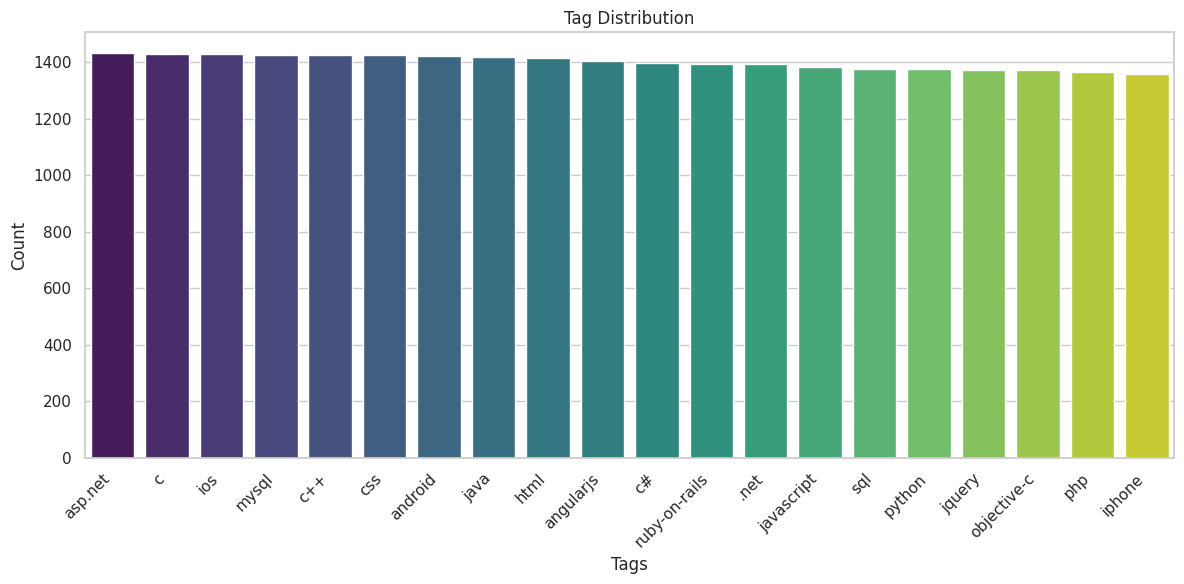

In [13]:
# Tag Distribution Analysis (Bar Chart)
plt.figure(figsize=(12, 6))
sns.set(style="whitegrid")
sns.countplot(x='tags', data=df, order=df['tags'].value_counts().index, palette='viridis')
plt.title('Tag Distribution')
plt.xlabel('Tags')
plt.ylabel('Count')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

In [14]:
# Check for duplicates
df.duplicated().sum()

0

In [15]:
def check_and_handle_missing_values(df):
    """
    Check for missing values in a DataFrame, drop rows with missing values.

    Parameters:
    - df: DataFrame

    Returns:
    - DataFrame: Updated DataFrame after dropping missing values.
    """
    # Check for missing values
    if df.isnull().any().any():
        print("Missing values found. Dropping rows with missing values.")
        # Drop rows with missing values
        df = df.dropna()
    else:
        print("No missing values found.")

    print("Missing value check task is done.")
    return df.head()

check_and_handle_missing_values(df)

No missing values found.
Missing value check task is done.


,Id,post,tags
0,1,what is causing this behavior in our c# datetime type <pre><code>[test] public void sadness() { var datetime = datetime.utcnow; assert.that(datetime is.equalto(datetime.parse(datetime.tostring()))); } </code></pre> failed : <pre><code> expected: 2011-10-31 06:12:44.000 but was: 2011-10-31 06:12:44.350 </code></pre> i wish to know what is happening behind the scenes in tostring() etc to cause this behavior. edit after seeing jon s answer : <pre><code>[test] public void newsadness() { var datetime = datetime.utcnow; assert.that(datetime is.equalto(datetime.parse(datetime.tostring( o )))); } </code></pre> result : <pre><code>expected: 2011-10-31 12:03:04.161 but was: 2011-10-31 06:33:04.161 </code></pre> same result with capital and small o . i m reading up the docs but still unclear.,c#
1,3,have dynamic html load as if it was in an iframe i have an asp.net 4.0 site. users can save an entire html page into the backend database. what i want to do is load the dynamic content into a div on an existing page in a content area and have a couple of things to happen: i do not want any of the css to affect anything outside the div when first trying this out loading of some badly formed html would move images and other divs outside the content area around. a lot of these html pages use the base tag for images and links i want the base tag respected inside the div. i have a solution that i am going to try which is just to use an iframe and set its url to another child page that loads the dynamic html into its own page entirely. i am just wondering if there is a better solution.,asp.net
2,4,how to convert a float value in to min:sec i m trying to convert my second in min:sec. my code is: <pre><code>- (ibaction)calcola:(id)sender { float grandezzakb= [[fieldgrandezza text] floatvalue]; float velocitambps= [[fieldvelocita text] floatvalue] ; float grandezzamb= grandezzakb*1000; float velocitakb = velocitambps*128; float seconditotali = grandezzamb/velocitakb; float min = seconditotali / 60; nsstring *risultato = [nsstring stringwithformat:@ %.02f minuti min]; [labelrisultato settext:risultato]; } </code></pre> sorry if it isn t english but i m italian :d someone can help me i ve already tried with the mod but it doesn t work with float :( sorry if the code isn t perfect but i m a newbie :),objective-c
3,5,.net framework 4 redistributable just wondering where we can get .net framework 4 beta redistributable. we would like to include it in our cd so we can distribute it to our clients and they need to install it from the cd and not from web as it is not necessary to have internet for our application. any suggestions will be appreciated. thanks navin,.net
4,6,trying to calculate and print the mean and its returning as a <function at> rather than a number python i have my program in python and i have used an external file with numbers in i created a list for the numbers to be stored in and then i need to find the mean standard deviation and the length of the list from this at the moment my program looks like this: <pre><code>data = open( gauss.dat r ) numbers=[] for line in data: numbers.append(line) sorted(numbers) def length(numbers): length = len(numbers) return length def mean(numbers): sum = 0 for element in numbers: sum += element mean = sum/length return (mean) def main(): global history print (length) print( the smallest number is + numbers[0]) print ( the largest number is + numbers[-1]) print(mean) return true if __name__ == __main__ : main() </code></pre> when i run the program <ol> <li>it doesn t sort the numbers correctly i am new to python so i don t know if there is an obvious error </li> <li>it prints out the mean and length as <code>&lt; function length at 0x039475b0 &gt;</code> <code>&lt; function mean at 0x03947630 &gt;</code>. i have no idea how to change this into a number </li> </ol> hope you can help.,python


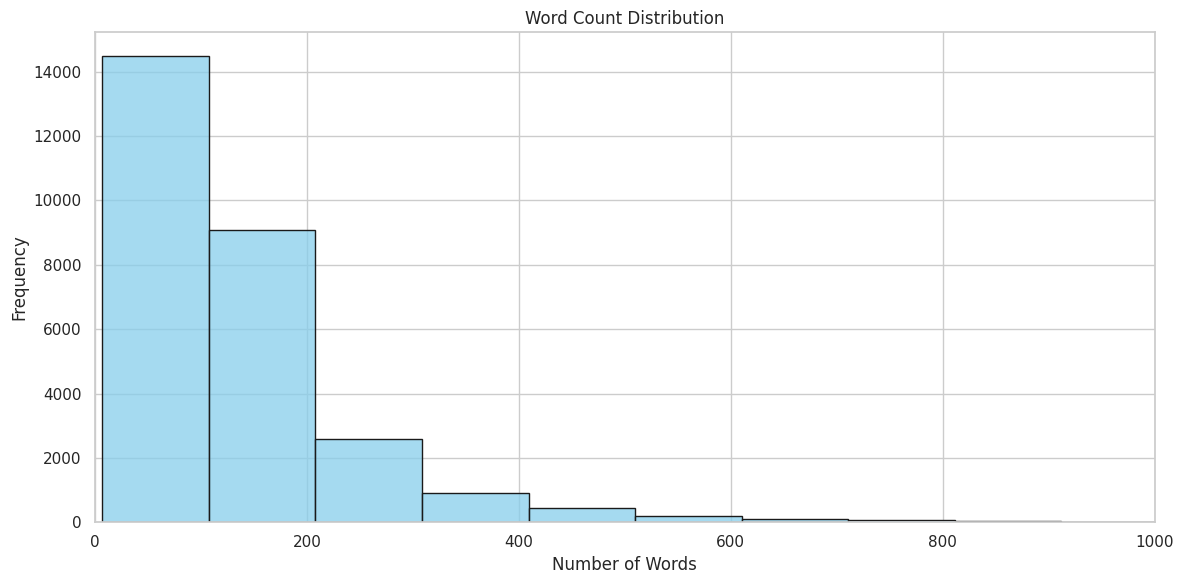

In [17]:
# Create a histogram to visualize the distribution of word counts using Seaborn
df['Word_Count'] = df['post'].apply(lambda x: len(x.split()))
plt.figure(figsize=(12, 6))
sns.histplot(df['Word_Count'], bins=30, color='skyblue', edgecolor='k')
plt.title('Word Count Distribution')
plt.xlabel('Number of Words')
plt.ylabel('Frequency')
plt.xlim(0, 1000)
plt.tight_layout()
plt.show()


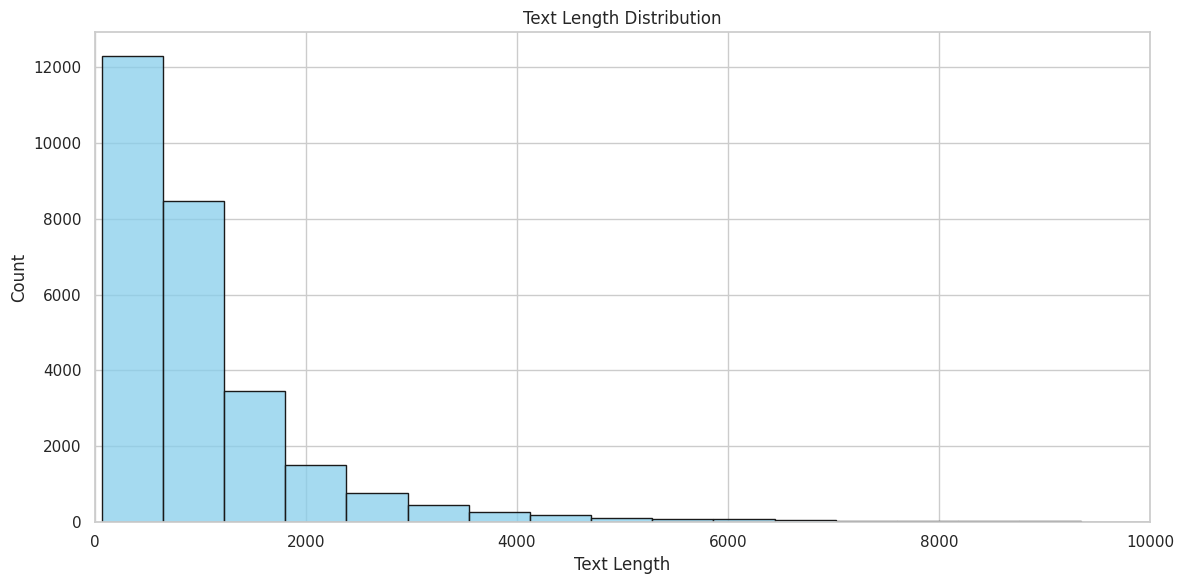

In [18]:
# Text Length Analysis
df['Content_length'] = df['post'].apply(len)
plt.figure(figsize=(12, 6))
sns.histplot(df['Content_length'], bins=60, color='skyblue',edgecolor='k')
plt.xlim(0, 10000)
plt.title('Text Length Distribution')
plt.xlabel('Text Length')
plt.ylabel('Count')
plt.tight_layout()
plt.show()

**In our dataset, we have a well-balanced distribution of tags, with each tag appearing approximately 1400 times. This ensures a diverse representation of topics within the data.**

**As we examine the distribution of word counts in each post, we find that the majority of posts contain fewer than 200 words. This suggests that the content in our dataset tends to be concise and to the point.When considering the distribution of text lengths, we observe that the majority of posts have a length of less than 1000 characters. This aligns with the word count distribution, emphasizing the trend of brevity in the content. Specifically, around 20,000 out of 28,000 total words fall within this range.**

**Overall, these distributions provide valuable insights into the characteristics of our dataset. The balanced tag distribution and the patterns in word counts and text lengths offer a glimpse into the nature of the content, guiding us in understanding the composition and structure of the information we're working with.**


## <a id='2.-Data-preprocessing'></a><span style="color:darkblue;">2. Data Preprocessing</span>

In [19]:
## no need to these columns in the next stages of work
data=df.drop(columns=['Id','Content_length','Word_Count'])

In [7]:
# Load NLTK stopwords
nltk.download('stopwords')
# Regular expressions for text cleaning
replace_space = re.compile('[/(){}\[\]\|@,;]')
bad_symbols = re.compile('[^a-z #+_]')
stop_words = set(stopwords.words('english'))


def clean_html(text):
    try:
        # Use both parsers for HTML decoding to handle potential issues
        cleaned_text = BeautifulSoup(text, "lxml").text
    except:
        cleaned_text = BeautifulSoup(text, "html.parser").text

    return cleaned_text

def preprocess_text(text, stop_words):
    text = text.lower()  # Convert to lowercase
    text = replace_space.sub(' ', text)  # Replace symbols with space
    text = bad_symbols.sub('', text)  # Remove bad symbols
    words = nltk.word_tokenize(text)
    words = [word for word in words if word not in stop_words]

    preprocessed_text = ' '.join(words)
    return preprocessed_text

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


In [ ]:
data['clean_post'] = data['post'].apply(clean_html)
data['clean_post'] = data['clean_post'].apply(lambda x: preprocess_text(x, stop_words))

#'clean_post' contains preprocessed text data and 'tags' contains corresponding tags
X = data['clean_post'].values
y = data['tags'].values

C:\Users\Junio\AppData\Local\Temp\ipykernel_3428\2364628953.py:19: MarkupResemblesLocatorWarning: The input looks more like a filename than markup. You may want to open this file and pass the filehandle into Beautiful Soup.
  cleaned_text = BeautifulSoup(text, "lxml").text


In [ ]:
# Compare post before and after processing
# x list of observation index
def compare_post(x):
    comparison_df = pd.DataFrame({
        'Original Post': data['post'].iloc[x],
        'Processed Post': data['clean_post'].iloc[x]
    })
    return comparison_df
compare_post([55,122])

,Original Post,Processed Post
55,how to reset an ios device to clear away old a...,reset ios device clear away old application ve...
122,how to select only those comments where associ...,select comments associated posts privacy table...


In [ ]:
# Split the data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

C:\Users\Junio\AppData\Local\Temp\ipykernel_3428\360440772.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=y_train_series, order=y_train_series.value_counts().index, palette='viridis')


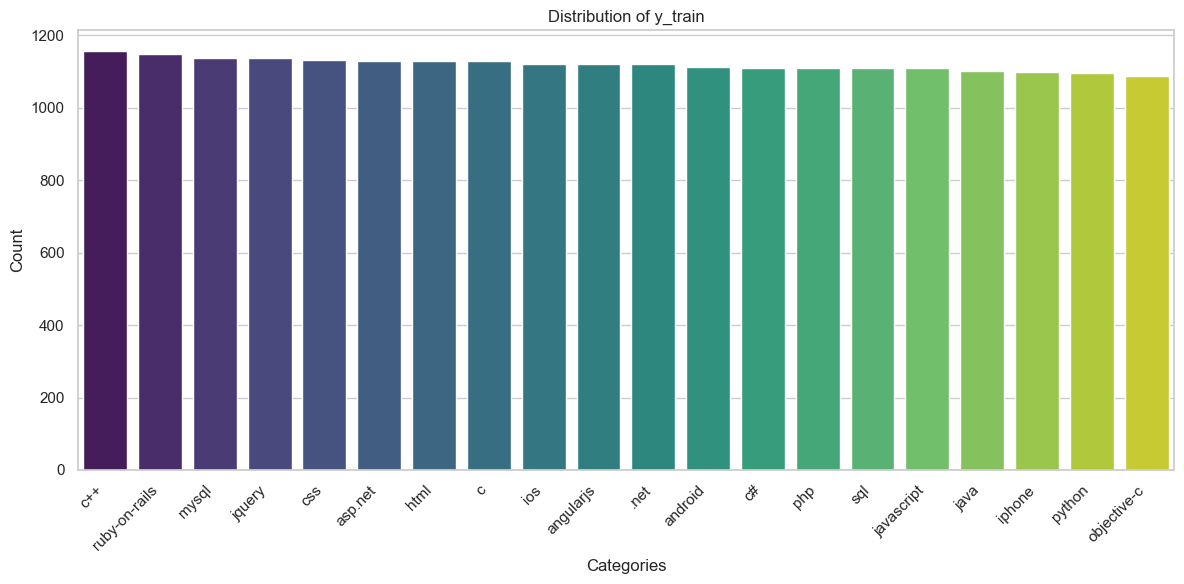

In [ ]:
# check tags distribution of training data after splitting
y_train_series = pd.Series(y_train)
plt.figure(figsize=(12, 6))
sns.countplot(x=y_train_series, order=y_train_series.value_counts().index, palette='viridis')
plt.title('Distribution of y_train')
plt.xlabel('Categories')
plt.ylabel('Count')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

### <span style="color:darkblue;">Tokenization and Vectorization</span>

In [25]:
# Custom tokenizer function
def custom_tokenizer(text):
    # Define the words you want to preserve as individual tokens
    special_words = ['c#', 'asp.net', 'objective-c', '.net', 'python', 'angularjs',
                     'iphone', 'ruby-on-rails', 'ios', 'c', 'sql', 'jquery', 'css',
                     'java', 'android', 'mysql', 'c++', 'javascript', 'html', 'php']

    # Regular expression pattern to find special words
    pattern = re.compile(r'\b(?:{})\b'.format('|'.join(map(re.escape, special_words))))

    # Find all occurrences of special words and replace them with a single token
    text = pattern.sub(lambda x: x.group().replace(' ', '_'), text)

    # Use regular expression to capture relevant tokens
    tokens = re.findall(r'\b\w+\b|\(|\)|\[|\]|\{|\}|\+|\-|\*|\/|\=|\<|\>|\,|\;|\:|\#', text)

    return tokens



In [ ]:

# Initialize CountVectorizer and TF-IDF Vectorizer with custom tokenizer
count_vectorizer = CountVectorizer(tokenizer=custom_tokenizer, max_features=15000)
tfidf_vectorizer = TfidfVectorizer(tokenizer=custom_tokenizer, max_features=15000)

# Fit and transform CountVectorizer and TF-IDF Vectorizer on X_train
X_train_count = count_vectorizer.fit_transform(X_train)
X_train_tfidf = tfidf_vectorizer.fit_transform(X_train)

# Transform X_test using fitted vectorizers
X_test_count = count_vectorizer.transform(X_test)
X_test_tfidf = tfidf_vectorizer.transform(X_test)

# Concatenate CountVectorizer and TF-IDF Vectorizer sparse matrices
from scipy.sparse import hstack
X_train_combined = hstack((X_train_count, X_train_tfidf))
X_test_combined = hstack((X_test_count, X_test_tfidf))


**Custom tokenizer function designed to preserve domain-specific terms and replace them with single tokens.The selection of special words is intentional, as they align with the labels present in the 'tags' column,capturing essential programming language and technology concepts within the text.**

## <a id='3.-Classification-Models'></a><span style="color:darkblue;">3. Classification Models</span>

### <span style="color:darkblue;">Random Forest Classifier: RF</span>

In [ ]:
# Model with default parameters.
# Initialize a RandomForestClassifier with specified parameters
rf_classifier = RandomForestClassifier(
    n_estimators=100,
    random_state=42,
    n_jobs=-1,
)

# Fit the RandomForestClassifier to the scaled training data
rf_classifier.fit(X_train_tfidf, y_train)

# Use the trained RandomForestClassifier to predict on the scaled test data
y_pred_rf = rf_classifier.predict(X_test_tfidf)

# Calculate the accuracy of the RandomForestClassifier
accuracy_rf = accuracy_score(y_test, y_pred_rf)

# Print the accuracy of the RandomForestClassifier
print(f'RandomForest Classifier Accuracy: {accuracy_rf:.4f}')


RandomForest Classifier Accuracy: 0.8020


#### <span style="color:red;">Grid Search for RF'</span>


In [ ]:
# Create a RandomForestClassifier
from sklearn.model_selection import KFold
rf_classifier = RandomForestClassifier()

# Define the parameter grid for Random Forest
param_grid = {
    'n_estimators': [50, 500, 1000, 3000, 5000],
    'max_features': ['sqrt', 'log2']}

# Limit the size of the training data (due to memory limitation with all data)
max_size = 8000

# Create a KFold object with 3 folds
kf = KFold(n_splits=3, shuffle=True, random_state=42)

# Create a GridSearchCV object
grid_search = GridSearchCV(
    estimator=rf_classifier,
    param_grid=param_grid,
    cv=kf,
    scoring='accuracy',
    n_jobs=-3
)

# Fit the GridSearchCV object to your data
grid_search.fit(X_train_tfidf[:max_size], y_train[:max_size])

# overall Best model from GridSearch:
best_params = grid_search.best_params_
best_score = grid_search.best_score_
print("Best Parameters:", best_params)
print("Best Accuracy Score:", best_score)

# Extract results from the GridSearchCV
results = grid_search.cv_results_

Best Parameters: {'max_features': 'sqrt', 'n_estimators': 3000}
Best Accuracy Score: 0.799250337518763


In [ ]:
# Fit the RandomForestClassifier to the training data
rf_classifier = RandomForestClassifier(n_estimators=3000, random_state=42, n_jobs=-1, max_features = "sqrt")

rf_classifier.fit(X_train_tfidf, y_train)

# Use the trained RandomForestClassifier to predict on the scaled test data
y_pred_rf = rf_classifier.predict(X_test_tfidf)

In [ ]:
accuracy = accuracy_score(y_test, y_pred_rf)
print("Accuracy on the test data:", accuracy)

Accuracy on the test data: 0.8094642857142857


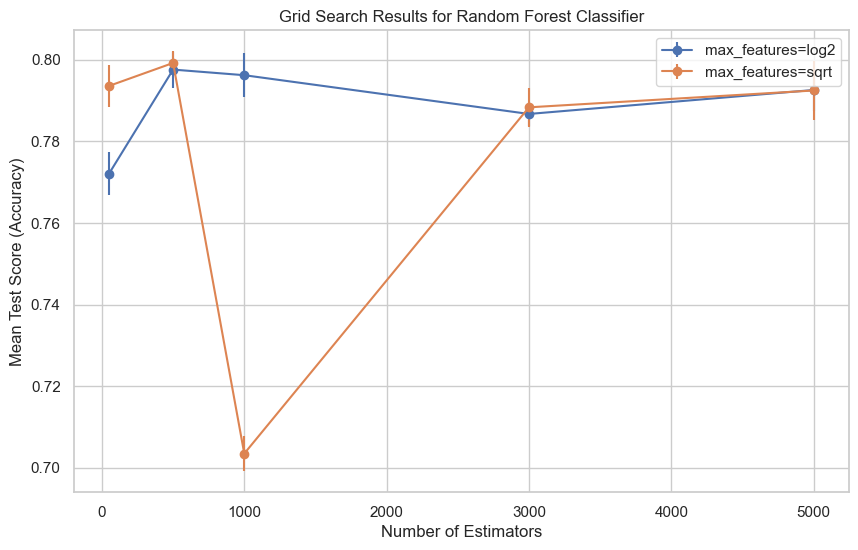

In [ ]:
# Extract relevant information from GridSearchCV results
n_estimators_values = param_grid['n_estimators']
log2_mean_test_scores = results['mean_test_score'][::2]  # Even indices correspond to 'log2'
sqrt_mean_test_scores = results['mean_test_score'][1::2]  # Odd indices correspond to 'sqrt'
log2_std_test_scores = results['std_test_score'][::2]  # Standard deviation for 'log2'
sqrt_std_test_scores = results['std_test_score'][1::2]  # Standard deviation for 'sqrt'

# Plot the curves with mean and standard deviation
plt.figure(figsize=(10, 6))
plt.errorbar(n_estimators_values, log2_mean_test_scores, yerr=log2_std_test_scores,
             label='max_features=log2', marker='o')
plt.errorbar(n_estimators_values, sqrt_mean_test_scores, yerr=sqrt_std_test_scores,
             label='max_features=sqrt', marker='o')

# Find the index for n_estimators = 3000 and max_features = "sqrt"
highlight_index = np.where((n_estimators_values == 3000) & (np.array(param_grid['max_features']) == "sqrt"))[0]
if len(highlight_index) > 0:
    highlight_index = highlight_index[0]
    highlight_n_estimators = n_estimators_values[highlight_index]
    highlight_sqrt_score = sqrt_mean_test_scores[highlight_index]

    # Highlight the specified point
    plt.scatter(highlight_n_estimators, highlight_sqrt_score,
                color='red', label='n_estimators=3000, max_features="sqrt"', marker='o', s=100)

    # Add text to highlight the point
    plt.text(highlight_n_estimators, highlight_sqrt_score, f'({highlight_n_estimators}, {highlight_sqrt_score:.4f})',
             ha='right', va='bottom')

# Add labels and title
plt.xlabel('Number of Estimators')
plt.ylabel('Mean Test Score (Accuracy)')
plt.title('Grid Search Results for Random Forest Classifier')
plt.legend()
plt.grid(True)
plt.show()


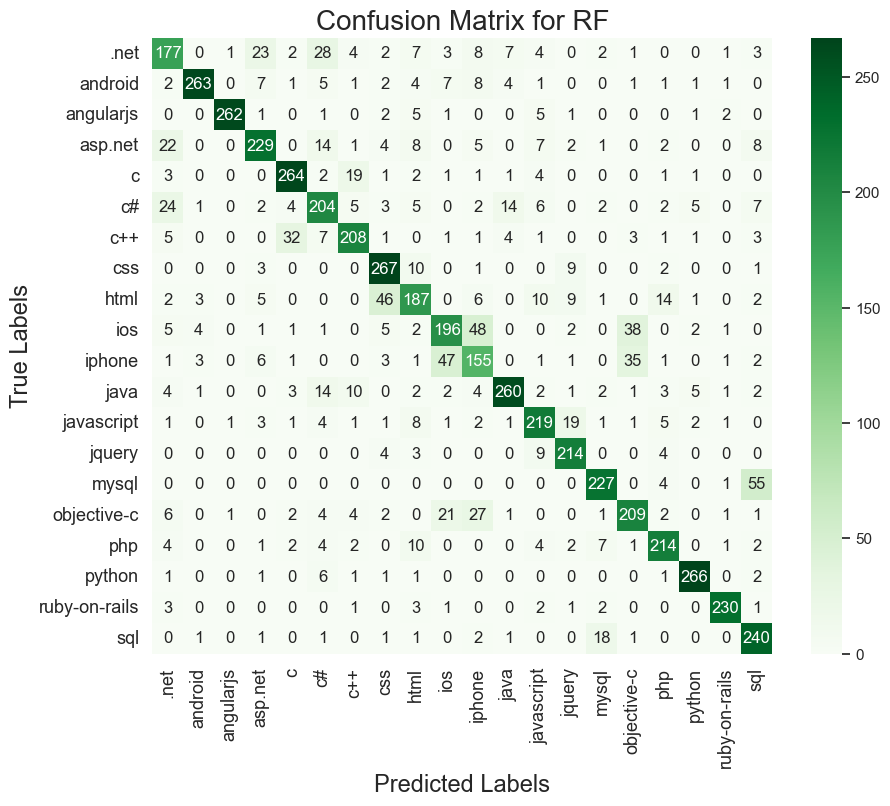

Classification Report:
                precision    recall  f1-score   support

         .net       0.68      0.65      0.66       273
      android       0.95      0.85      0.90       309
    angularjs       0.99      0.93      0.96       281
      asp.net       0.81      0.76      0.78       303
            c       0.84      0.88      0.86       300
           c#       0.69      0.71      0.70       286
          c++       0.81      0.78      0.79       268
          css       0.77      0.91      0.84       293
         html       0.72      0.65      0.69       286
          ios       0.70      0.64      0.67       306
       iphone       0.57      0.60      0.59       258
         java       0.89      0.82      0.85       317
   javascript       0.80      0.81      0.80       272
       jquery       0.82      0.91      0.86       234
        mysql       0.86      0.79      0.82       287
  objective-c       0.72      0.74      0.73       282
          php       0.83      0.84      

In [ ]:
#Confusion Matrix RF
# Calculate confusion matrix
from sklearn.metrics import classification_report
conf_matrix_rf = confusion_matrix(y_test, y_pred_rf)

# Visualize confusion matrix
plt.figure(figsize=(10, 8))
sns.heatmap(conf_matrix_rf, annot=True, fmt='d', cmap='Greens',
            xticklabels=rf_classifier.classes_, yticklabels=rf_classifier.classes_)
plt.xlabel('Predicted Labels', fontsize = 17)
plt.ylabel('True Labels', fontsize = 17)
plt.title('Confusion Matrix for RF', fontsize = 20)
plt.xticks(fontsize=13)
plt.yticks(fontsize=13)
plt.savefig("Confusion_Matrix_RF.png")
plt.show()

# Classification Report
class_report = classification_report(y_test, y_pred_rf)
print("Classification Report:\n", class_report)


### <span style="color:darkblue;">Support Vector Classifier: SVC</span>

In [ ]:
# Initialize a Support Vector Machine (SVM) classifier with specified parameters
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report
svm_classifier = SVC(
    kernel='linear',
    C=1)

# Fit the SVM classifier to the scaled training data
svm_classifier.fit(X_train_tfidf, y_train)

# Use the trained SVM classifier to predict on the scaled test data
y_pred_svm = svm_classifier.predict(X_test_tfidf)

# Calculate the accuracy of the SVM classifier
accuracy_svm = accuracy_score(y_test, y_pred_svm)

# Print the accuracy of the SVM classifier
print(f'Support Vector Machine (SVM) Classifier Accuracy: {accuracy_svm:.4f}')


Support Vector Machine (SVM) Classifier Accuracy: 0.7863


#### <span style="color:red;">Grid Search with 'linear' kernel</span>


In [ ]:
# Define the parameter grid for SVM
param_grid = {'C': [0.1, 0.3, 0.5, 0.7, 2]}

# Initialize the SVM model
svm_classifier = SVC(kernel='linear', random_state=42)

# Initialize GridSearchCV with cross-validation and accuracy scoring
grid_search = GridSearchCV(
    estimator=svm_classifier,
    param_grid=param_grid,
    cv=5,
    scoring='accuracy',
    n_jobs=-1
)

# Train the SVM model with GridSearchCV
grid_search.fit(X_train_tfidf, y_train)

# Get the best parameters and best accuracy score
best_params = grid_search.best_params_
best_score = grid_search.best_score_

# Print the results
print("Best Parameters:", best_params)
print("Best Accuracy Score:", best_score)


Best Parameters: {'C': 0.7}
Best Accuracy Score: 0.7805803571428572


In [ ]:
# Access the grid search results
results_Linear = grid_search.cv_results_

# Print the accuracy scores for each fold and parameter combination
for mean_score, std_score, params in zip(results_Linear['mean_test_score'], results_Linear['std_test_score'], results_Linear['params']):
    print(f"Mean accuracy: {mean_score:.4f} (±{std_score:.4f}) for params: {params}")

Mean accuracy: 0.7341 (±0.0036) for params: {'C': 0.1}
Mean accuracy: 0.7725 (±0.0054) for params: {'C': 0.3}
Mean accuracy: 0.7783 (±0.0071) for params: {'C': 0.5}
Mean accuracy: 0.7806 (±0.0080) for params: {'C': 0.7}
Mean accuracy: 0.7745 (±0.0046) for params: {'C': 2}


In [ ]:
# Get the best SVM classifier from the grid search
best_svm_classifier = grid_search.best_estimator_

# Fit the best RF classifier to the training data
best_svm_classifier.fit(X_train_tfidf, y_train)

# predictions on the test data
y_pred_svm = best_svm_classifier.predict(X_test_tfidf)

In [ ]:
accuracy_svm_Linear = accuracy_score(y_test, y_pred_svm)
print(accuracy_svm_Linear)

0.7898214285714286


C:\Users\Junio\AppData\Local\Temp\ipykernel_3428\2129940969.py:15: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  ax = sns.lineplot(x='C', y='Accuracy', data=scores_df, marker='o', palette='viridis', label='Accuracy Trend')


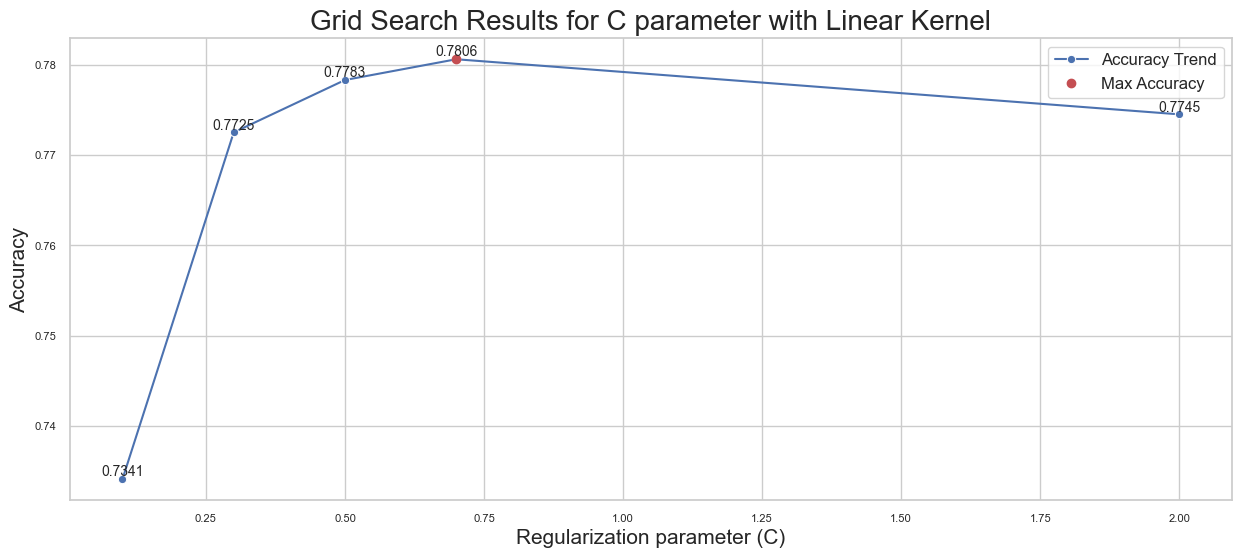

In [ ]:
## Accuracy Plot: Linear

# Define the values for C that were used in the grid search
param_grid_C = [.1, .3, .5, .7, 2]

# Define the accuracy scores obtained during grid search (replace this with your actual scores)
accuracy_scores = [0.7341,0.7725, 0.7783, 0.7806, 0.7745]  # Replace with your accuracy scores

# Create a DataFrame to hold the scores
scores_df = pd.DataFrame({'C': param_grid_C, 'Accuracy': accuracy_scores})


plt.figure(figsize=(15, 6))
# Plotting the line plot
ax = sns.lineplot(x='C', y='Accuracy', data=scores_df, marker='o', palette='viridis', label='Accuracy Trend')

# Adding text annotations with exact values at data points
for line in ax.lines:
    for x, y in zip(line.get_xdata(), line.get_ydata()):
        ax.text(x, y, f'{y:.4f}', ha='center', va='bottom', fontsize=10)

# Highlighting the point with the maximum value
max_value = scores_df['Accuracy'].max()
max_index = scores_df['Accuracy'].idxmax()
ax.plot(scores_df.loc[max_index, 'C'], max_value, 'ro', label='Max Accuracy')  # Highlight the maximum value point with red dot

# Display legends
plt.legend(fontsize=12)

plt.xlabel('Regularization parameter (C)', fontsize=15)
plt.ylabel('Accuracy', fontsize=15)
plt.title('Grid Search Results for C parameter with Linear Kernel', fontsize=20)
plt.xticks(fontsize=8)
plt.yticks(fontsize=8)
plt.savefig("Tuning_Parameter_SVM_Linear.png")
plt.show()


#### <span style="color:red;">Grid Search with 'rbf' kernel</span>

In [ ]:
# SVC with rbf Kernel (default parameters)
# Initialize a Support Vector Machine (SVM) classifier with specified parameters
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report
svm_classifier = SVC(
    kernel='rbf',
    C=1)

# Fit the SVM classifier to the scaled training data
svm_classifier.fit(X_train_tfidf, y_train)

# Use the trained SVM classifier to predict on the scaled test data
y_pred_svm = svm_classifier.predict(X_test_tfidf)

# Calculate the accuracy of the SVM classifier
accuracy_svm = accuracy_score(y_test, y_pred_svm)

# Print the accuracy of the SVM classifier
print(f'Support Vector Machine (SVM) Classifier Accuracy: {accuracy_svm:.4f}')


Support Vector Machine (SVM) Classifier Accuracy: 0.7895


In [ ]:
# Define the parameter grid for SVM
param_grid = {'C': [1, 3, 5, 7, 10]}

# Initialize the SVM model
svm_classifier_RBF = SVC(kernel='rbf', random_state=42)

# Initialize GridSearchCV with cross-validation and accuracy scoring
grid_search_RBF = GridSearchCV(
    estimator=svm_classifier_RBF,
    param_grid=param_grid,
    cv=5,
    scoring='accuracy',
    n_jobs=-1
)

# Train the SVM model with GridSearchCV
grid_search_RBF.fit(X_train_tfidf, y_train)

# Get the best parameters and best accuracy score
best_params_RBF = grid_search_RBF.best_params_
best_score_RBF = grid_search_RBF.best_score_

# Print the results
print("Best Parameters:", best_params_RBF)
print("Best Accuracy Score:", best_score_RBF)
# Get the best SVM classifier from the grid search
best_svm_classifier_RBF = grid_search_RBF.best_estimator_

# Fit the best RF classifier to the training data
best_svm_classifier_RBF.fit(X_train_tfidf, y_train)

# predictions on the test data
svm_predictions_RBF = best_svm_classifier_RBF.predict(X_test_tfidf)

Best Parameters: {'C': 5}
Best Accuracy Score: 0.7837500000000001


In [ ]:
# Access the grid search results
results_RBF = grid_search_RBF.cv_results_

# Print the accuracy scores for each fold and parameter combination
for mean_score, std_score, params in zip(results_RBF['mean_test_score'], results_RBF['std_test_score'], results_RBF['params']):
    print(f"Mean accuracy: {mean_score:.4f} (±{std_score:.4f}) for params: {params}")

Mean accuracy: 0.7781 (±0.0054) for params: {'C': 1}
Mean accuracy: 0.7837 (±0.0043) for params: {'C': 3}
Mean accuracy: 0.7838 (±0.0044) for params: {'C': 5}
Mean accuracy: 0.7837 (±0.0044) for params: {'C': 7}
Mean accuracy: 0.7836 (±0.0044) for params: {'C': 10}


In [ ]:
# Get the best SVM classifier from the grid search
best_svm_classifier_RBF = grid_search_RBF.best_estimator_

# Fit the best RF classifier to the training data
best_svm_classifier_RBF.fit(X_train_tfidf, y_train)

# predictions on the test data
y_pred_svm = best_svm_classifier_RBF.predict(X_test_tfidf)

C:\Users\Junio\AppData\Local\Temp\ipykernel_3428\2147476217.py:22: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  ax = sns.lineplot(x='C', y='Accuracy', data=scores_df, marker='o', palette='viridis', label='Accuracy Trend')


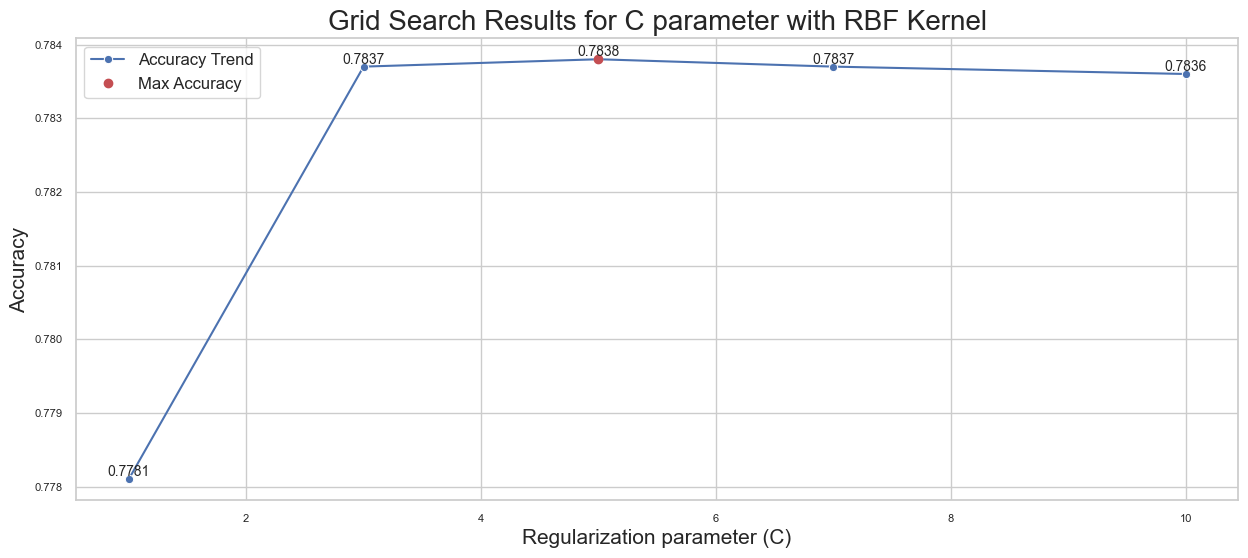

In [ ]:
# Define the values for C that were used in the grid search
param_grid_C = [1,3,5,7,10]

# Define the accuracy scores obtained during grid search
accuracy_scores = [0.7781,0.7837, 0.7838, 0.7837, 0.7836]  ## obtained from grid

# Create a DataFrame to hold the scores
scores_df = pd.DataFrame({'C': param_grid_C, 'Accuracy': accuracy_scores})


import seaborn as sns
import matplotlib.pyplot as plt

import seaborn as sns
import matplotlib.pyplot as plt

# Assuming scores_df contains the necessary data

plt.figure(figsize=(15, 6))

# Plotting the line plot
ax = sns.lineplot(x='C', y='Accuracy', data=scores_df, marker='o', palette='viridis', label='Accuracy Trend')

# Adding text annotations with exact values at data points
for line in ax.lines:
    for x, y in zip(line.get_xdata(), line.get_ydata()):
        ax.text(x, y, f'{y:.4f}', ha='center', va='bottom', fontsize=10)

# Highlighting the point with the maximum value
max_value = scores_df['Accuracy'].max()
max_index = scores_df['Accuracy'].idxmax()
ax.plot(scores_df.loc[max_index, 'C'], max_value, 'ro', label='Max Accuracy')  # Highlight the maximum value point with red dot

# Display legends
plt.legend(fontsize=12)

plt.xlabel('Regularization parameter (C)', fontsize=15)
plt.ylabel('Accuracy', fontsize=15)
plt.title('Grid Search Results for C parameter with RBF Kernel', fontsize=20)
plt.xticks(fontsize=8)
plt.yticks(fontsize=8)
plt.savefig("Tuning_Parameter_SVM_RBF.png")
plt.show()


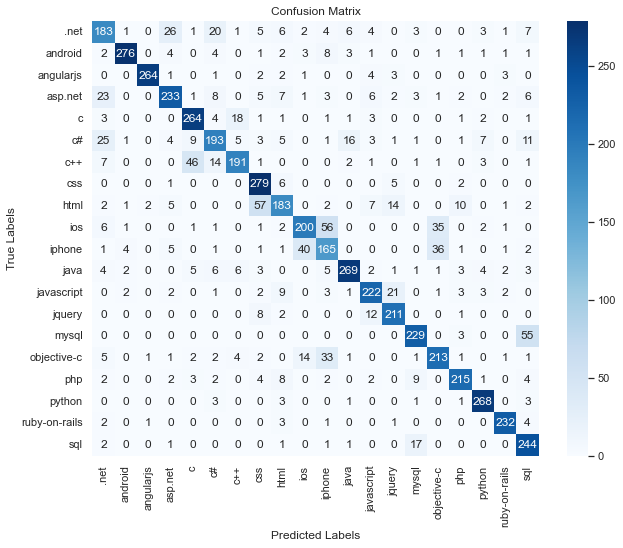

In [ ]:
# Calculate confusion matrix
conf_matrix_svm = confusion_matrix(y_test, svm_predictions)

# Visualize confusion matrix
plt.figure(figsize=(10, 8))
sns.heatmap(conf_matrix_svm, annot=True, fmt='d', cmap='Blues',
            xticklabels=svm_classifier.classes_, yticklabels=svm_classifier.classes_)
plt.xlabel('Predicted Labels', fontsize = 17)
plt.ylabel('True Labels', fontsize = 17)
plt.title('Confusion Matrix for SVM', fontsize = 20)
plt.xticks(fontsize=13)
plt.yticks(fontsize=13)
plt.savefig("Confusion_Matrix_SVM.png")
plt.show()

# Classification Report
class_report = classification_report(y_test, svm_predictions)
print("Classification Report:\n", class_report)


#### <span style="color:red;">Training Time</span>

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
import time

def get_training_times(X, y):
    # Training Random Forest
    rf_start_time = time.time()
    rf = RandomForestClassifier()
    rf.fit(X, y)
    rf_end_time = time.time()
    rf_training_time = rf_end_time - rf_start_time

    # Training SVM
    svm_start_time = time.time()
    svm = SVC()
    svm.fit(X, y)
    svm_end_time = time.time()
    svm_training_time = svm_end_time - svm_start_time

    return rf_training_time, svm_training_time

# Example usage:
# Assuming you have your features 'X' and target variable 'y'
# Replace 'X' and 'y' with your actual data
rf_training_time, svm_training_time = get_training_times(X_train_tfidf, y_train)

In [ ]:
# Now, you can use these training times in your plotting code as follows:
models = ['Random Forest', 'SVM']
training_times = [rf_training_time, svm_training_time]

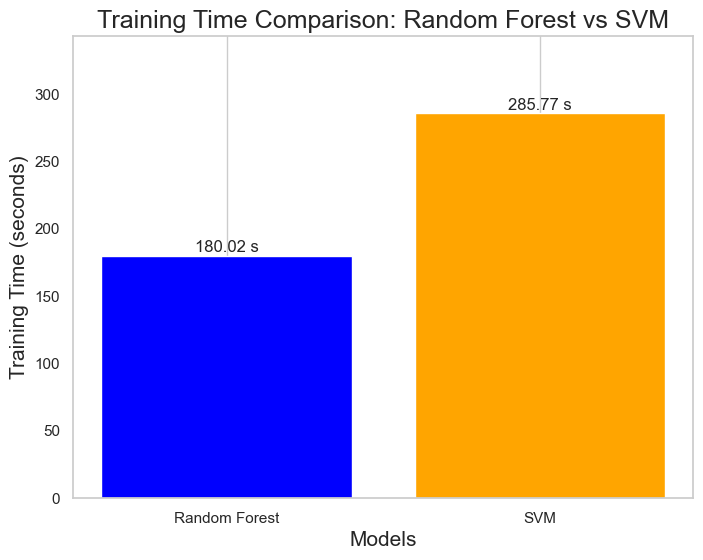

In [ ]:
import matplotlib.pyplot as plt

plt.figure(figsize=(8, 6))
plt.bar(models, training_times, color=['blue', 'orange'])
plt.xlabel('Models', fontsize = 15)
plt.ylabel('Training Time (seconds)', fontsize = 15)
plt.title('Training Time Comparison: Random Forest vs SVM', fontsize = 18)
plt.ylim(0, max(training_times) * 1.2)
plt.grid(axis='y')

for i, value in enumerate(training_times):
    plt.text(i, value + 0.5, f'{value:.2f} s', ha='center', va='bottom')
plt.savefig("Training_Time_Comparison.png")
plt.show()

### <span style="color:darkblue;">Stacking Classifier </span>

In [ ]:
# Create a stacking classifier
base_classifiers = [('Random Forest', best_rf_classifier), ('SVM', best_svm_classifier)]
stack_model = StackingClassifier(
    estimators=base_classifiers,
    final_estimator=RandomForestClassifier(n_estimators=2000, random_state=42, n_jobs=-1, max_features="sqrt")
)

# Step 3: Fit the stacking model on the base models' predictions
stack_model.fit(X_train_tfidf, y_train)

# Step 4: Make predictions on the test data
y_pred_stack = stack_model.predict(X_test_tfidf)

# Step 5: Evaluate the stacking model
accuracy_stack = accuracy_score(y_test, y_pred_stack)
print(f'Stacking Model Accuracy: {accuracy_stack:.4f}')


array(['c#', 'asp.net', 'objective-c', '.net', 'python', 'angularjs',
       'iphone', 'ruby-on-rails', 'ios', 'c', 'sql', 'jquery', 'css',
       'java', 'android', 'mysql', 'c++', 'javascript', 'html', 'php'],
      dtype=object)

## <a id='4.-Tags-Classification'></a><span style="color:darkblue;">4. Tags Classification</span>

#### <span style="color:red;">Word Cloud</span>

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
<ipython-input-7-bf8ddf291e88>:21: MarkupResemblesLocatorWarning: The input looks more like a filename than markup. You may want to open this file and pass the filehandle into Beautiful Soup.
  cleaned_text = BeautifulSoup(text, "lxml").text
<ipython-input-22-d04964918a48>:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ios_data['clean_text'] = ios_data['post'].apply(clean_html)
<ipython-input-7-bf8ddf291e88>:21: MarkupResemblesLocatorWarning: The input looks more like a filename than markup. You may want to open this file and pass the filehandle into Beautiful Soup.
  cleaned_text = BeautifulSoup(text, "lxml").text
<ipython-input-22-d

Plot saved to: WordCloud_ios
Plot saved to: WordCloud_HTML
Plot saved to: WordCloud_Python
Plot saved to: WordCloud_iPhone


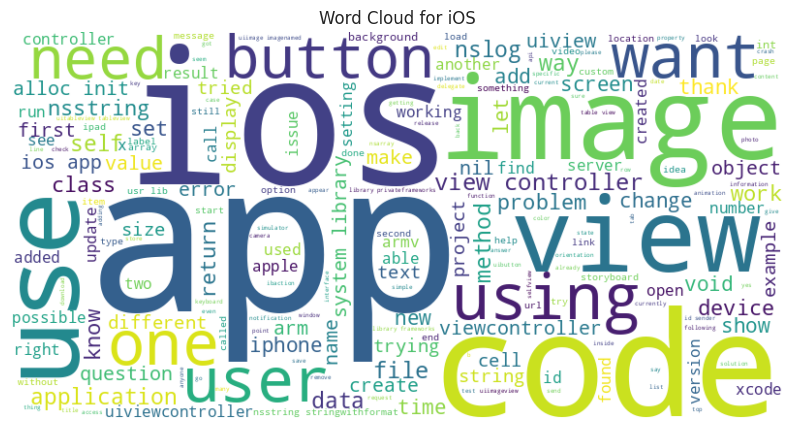

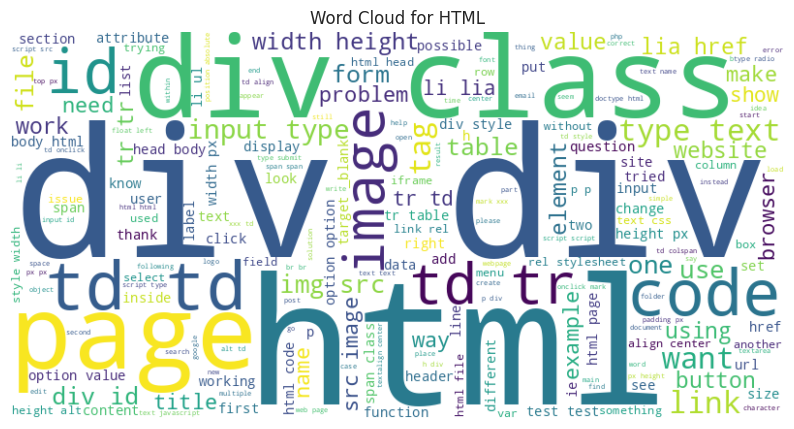

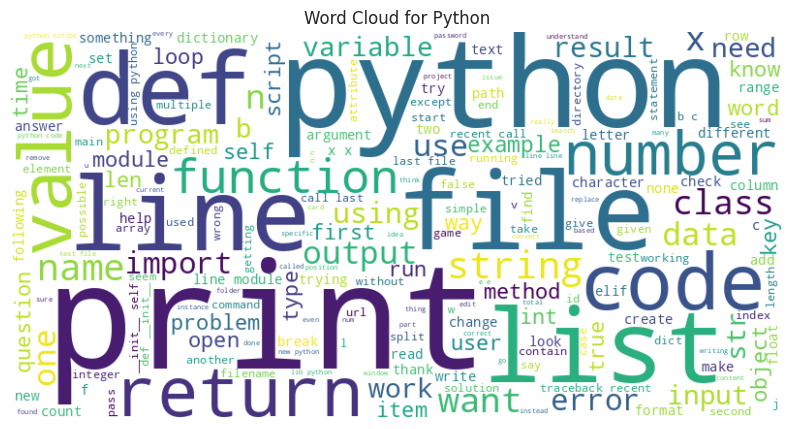

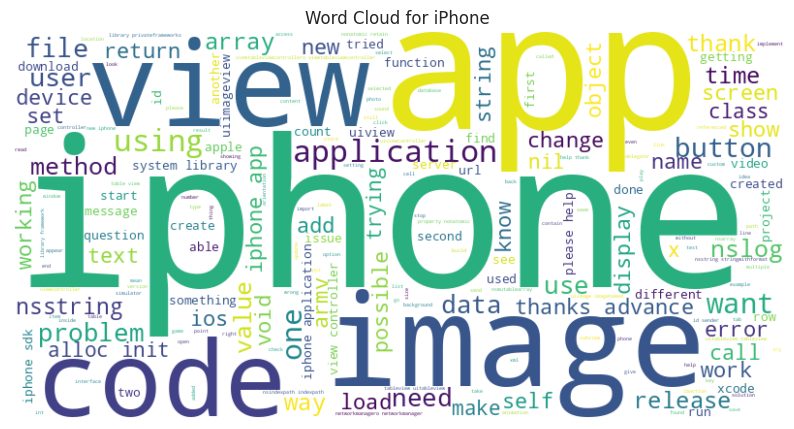

In [22]:
# Separate datasets for each tag
import nltk
from wordcloud import WordCloud
import matplotlib.pyplot as plt
nltk.download('punkt')
ios_data = data[data['tags'] == 'ios']
html_data = data[data['tags'] == 'html']
python_data = data[data['tags'] == 'python']
iphone_data = data[data['tags'] == 'iphone']
# clean_html and preprocess the text data
ios_data['clean_text'] = ios_data['post'].apply(clean_html)
html_data['clean_text'] = html_data['post'].apply(clean_html)
python_data['clean_text'] = python_data['post'].apply(clean_html)
iphone_data['clean_text'] = iphone_data['post'].apply(clean_html)

ios_data['clean_text'] = ios_data['clean_text'].apply(lambda x: preprocess_text(x, stop_words))
html_data['clean_text'] = html_data['clean_text'].apply(lambda x: preprocess_text(x, stop_words))
python_data['clean_text'] = python_data['clean_text'].apply(lambda x: preprocess_text(x, stop_words))
iphone_data['clean_text'] = iphone_data['clean_text'].apply(lambda x: preprocess_text(x, stop_words))


def generate_wordcloud(data, tag, save_path = None):
    # Concatenate text data for the specified tag into a single string
    text_data = ' '.join(data['clean_text'])

    # Generate word cloud
    wordcloud = WordCloud(width=800, height=400, background_color='white',
                          prefer_horizontal=0.9, contour_color='steelblue').generate(text_data)

    # Display the word cloud
    plt.figure(figsize=(10, 6))
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.title(f'Word Cloud for {tag}')
    plt.axis('off')
    if save_path:
        plt.savefig(save_path)  # Save the plot to the specified path
        print(f"Plot saved to: {save_path}")
    else:
        plt.show()

# Generate word clouds for each tag
generate_wordcloud(ios_data, 'iOS','WordCloud_ios')
generate_wordcloud(html_data, 'HTML','WordCloud_HTML')
generate_wordcloud(python_data, 'Python','WordCloud_Python')
generate_wordcloud(iphone_data, 'iPhone','WordCloud_iPhone')

#### <span style="color:red;">TF-IDF and Count Vectorizer Scores</span>

/usr/local/lib/python3.10/dist-packages/sklearn/feature_extraction/text.py:528: UserWarning: The parameter 'token_pattern' will not be used since 'tokenizer' is not None'
  warnings.warn(


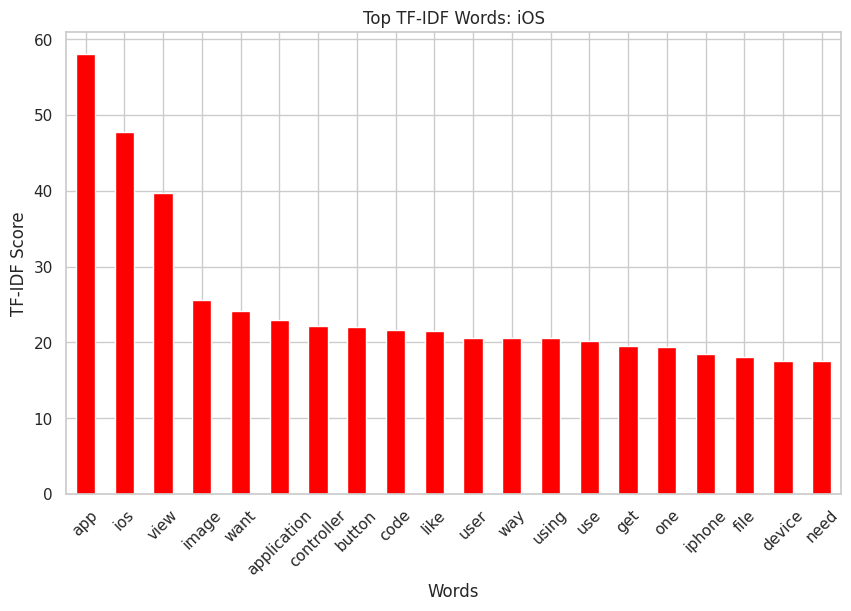

/usr/local/lib/python3.10/dist-packages/sklearn/feature_extraction/text.py:528: UserWarning: The parameter 'token_pattern' will not be used since 'tokenizer' is not None'
  warnings.warn(


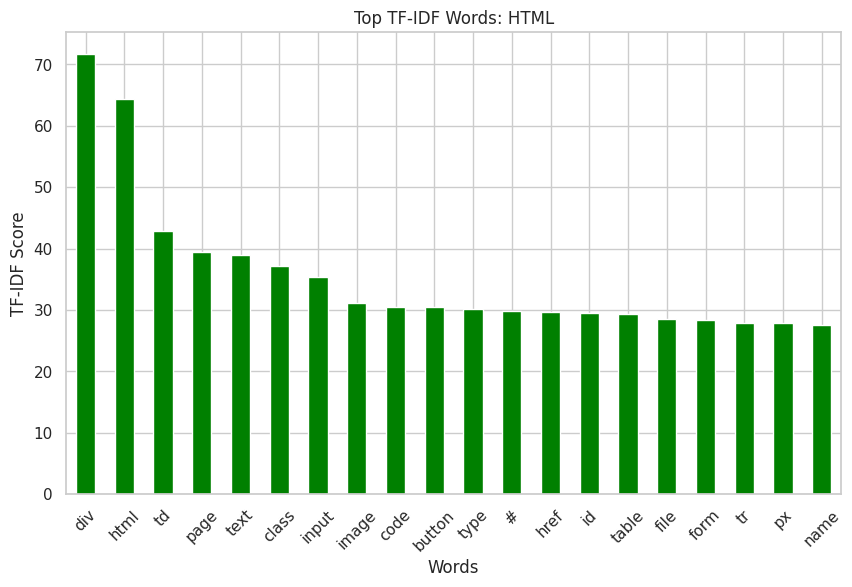

/usr/local/lib/python3.10/dist-packages/sklearn/feature_extraction/text.py:528: UserWarning: The parameter 'token_pattern' will not be used since 'tokenizer' is not None'
  warnings.warn(


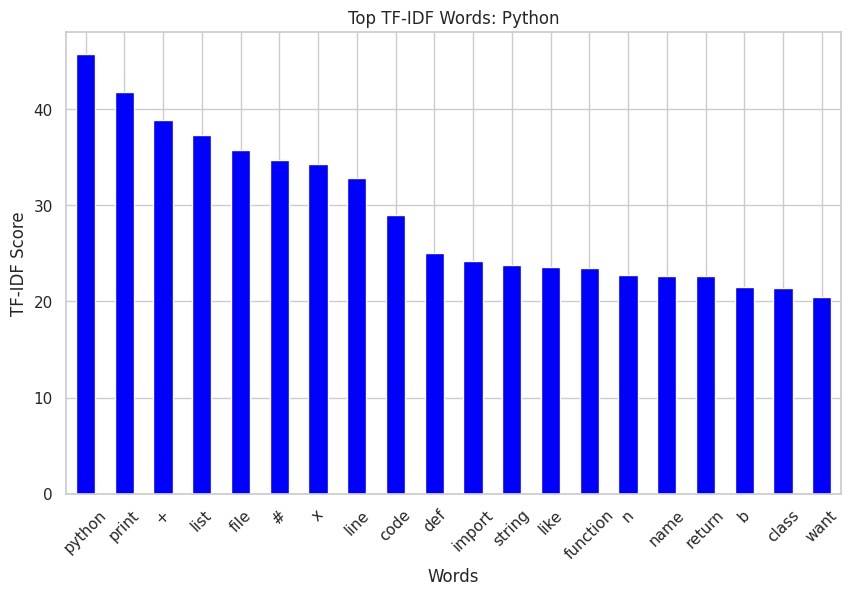

/usr/local/lib/python3.10/dist-packages/sklearn/feature_extraction/text.py:528: UserWarning: The parameter 'token_pattern' will not be used since 'tokenizer' is not None'
  warnings.warn(


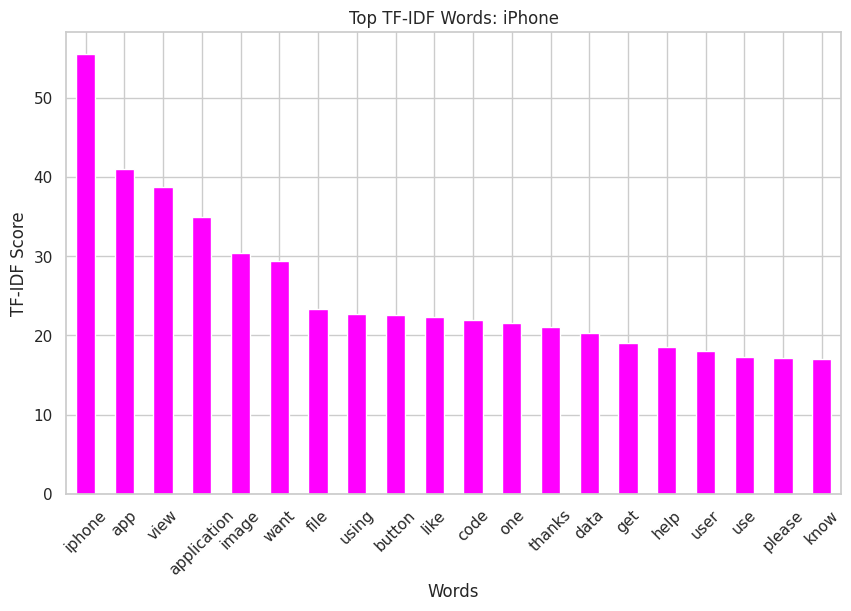

In [26]:
def calculate_tfidf(data, tag_name, color='blue'):
    vectorizer = TfidfVectorizer(tokenizer=custom_tokenizer, max_features=15000)
    tfidf_matrix = vectorizer.fit_transform(data['clean_text'])
    feature_names = vectorizer.get_feature_names_out()
    tfidf_df = pd.DataFrame(tfidf_matrix.toarray(), columns=feature_names)
    top_tfidf_words = tfidf_df.sum().sort_values(ascending=False).head(20)  # Top 20 words
    plt.figure(figsize=(10, 6))
    top_tfidf_words.plot(kind='bar', color=color)  # Set the color here
    plt.title('Top TF-IDF Words: ' + tag_name)
    plt.xlabel('Words')
    plt.ylabel('TF-IDF Score')
    plt.xticks(rotation=45)
    plt.show()

# Calculate TF-IDF for each tag with different colors
calculate_tfidf(ios_data, "iOS", color='red')
#plt.savefig('/content/drive/MyDrive/ML/ML Project/Pics/iostfidf.png')
calculate_tfidf(html_data, "HTML", color='green')
#plt.savefig('/content/drive/MyDrive/ML/ML Project//Pics/htmltfidf.png')
calculate_tfidf(python_data, "Python", color='blue')
#plt.savefig('/content/drive/MyDrive/ML/ML Project/Pics/pythontfidf.png')
calculate_tfidf(iphone_data, "iPhone", color='magenta')

C:\Users\Junio\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\feature_extraction\text.py:525: UserWarning: The parameter 'token_pattern' will not be used since 'tokenizer' is not None'
  warnings.warn(


Plot saved to: ios_count_vectorizer.png


C:\Users\Junio\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\feature_extraction\text.py:525: UserWarning: The parameter 'token_pattern' will not be used since 'tokenizer' is not None'
  warnings.warn(


Plot saved to: html_count_vectorizer.png


C:\Users\Junio\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\feature_extraction\text.py:525: UserWarning: The parameter 'token_pattern' will not be used since 'tokenizer' is not None'
  warnings.warn(


Plot saved to: python_count_vectorizer.png


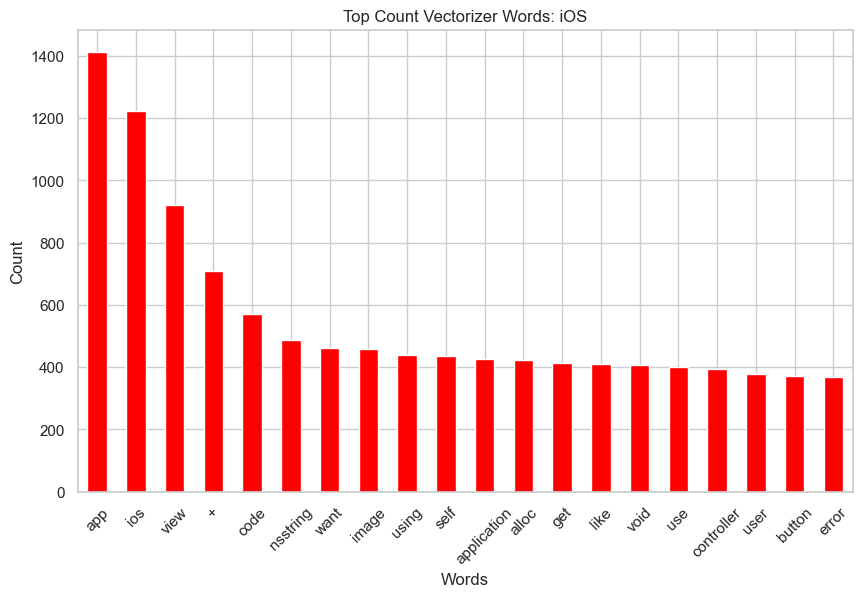

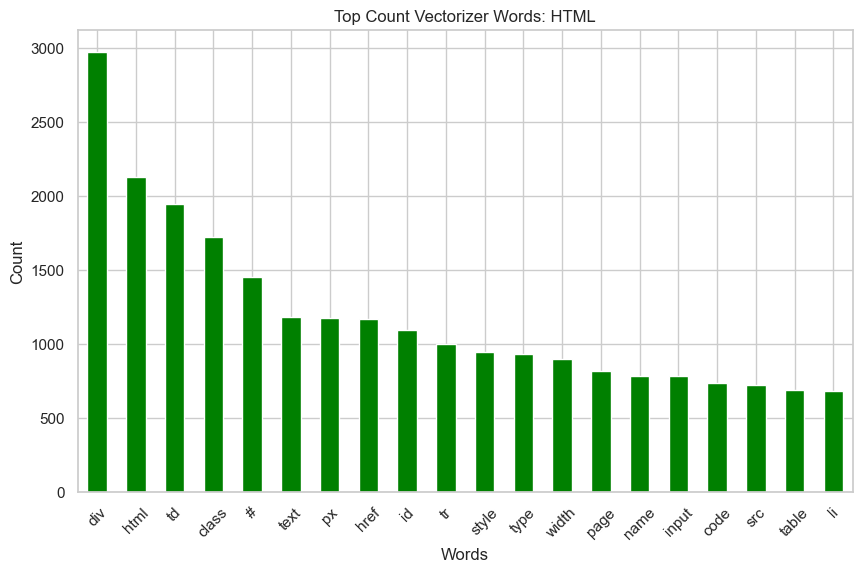

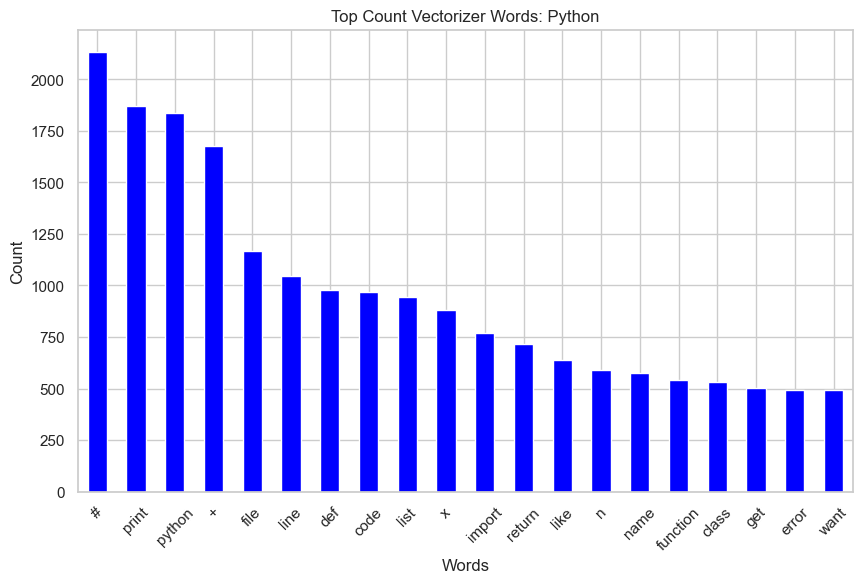

In [ ]:
def calculate_count_vectorizer(data, tag_name, color='blue', save_path=None):
    vectorizer = CountVectorizer(tokenizer=custom_tokenizer, max_features=15000)
    count_matrix = vectorizer.fit_transform(data['clean_text'])
    feature_names = vectorizer.get_feature_names_out()
    count_df = pd.DataFrame(count_matrix.toarray(), columns=feature_names)
    top_count_words = count_df.sum().sort_values(ascending=False).head(20)  # Top 20 words
    plt.figure(figsize=(10, 6))
    top_count_words.plot(kind='bar', color=color)  # Set the color here
    plt.title('Top Count Vectorizer Words: ' + tag_name)
    plt.xlabel('Words')
    plt.ylabel('Count')
    plt.xticks(rotation=45)

    if save_path:
        plt.savefig(save_path)  # Save the plot to the specified path
        print(f"Plot saved to: {save_path}")
    else:
        plt.show()

# Save Count Vectorizer plots to Google Drive
calculate_count_vectorizer(ios_data, "iOS", color='red', save_path='ios_count_vectorizer.png')
calculate_count_vectorizer(html_data, "HTML", color='green', save_path='html_count_vectorizer.png')
calculate_count_vectorizer(python_data, "Python", color='blue', save_path='python_count_vectorizer.png')


## <a id='5.-Prediction-on-Final-Data'></a><span style="color:darkblue;">5. Prediction on Final Data</span>

In [ ]:
#full absolute path to our CSV file
file_path = 'test.csv'
test_df = pd.read_csv(file_path)
#pd.set_option("max_colwidth", None)

# Call the function with the subset DataFrame
test_df.head()

,Id,post
0,2,have dynamic html load as if it was in an ifra...
1,12,how to install .ipa on jailbroken iphone over ...
2,13,dynamic textbox text - asp.net i m trying to ...
3,19,distance between 2 or more drop pins i was do...
4,22,clarification required on responsibility of $...


In [ ]:
print(f'the shape of the data:',test_df.shape)

the shape of the data: (12000, 2)


In [ ]:
# Preprocess the text data in the test_df DataFrame
test_df['post'] = test_df['post'].apply(clean_html)
test_df['post'] = test_df['post'].apply(lambda x: preprocess_text(x, stop_words))

X_final = test_df['post'].values
X_final_tfidf = tfidf_vectorizer.transform(X_final)

# Make predictions using the stacked model
y_final_pred = rf_classifier.predict(X_final)


In [ ]:
# Create a DataFrame with predictions and Ids
Sol = pd.DataFrame({'Id': test_df['Id'], 'tags': y_final_pred})

# Set 'Id' as the index
Sol.set_index('Id', drop=True, inplace=True)

# Save the DataFrame to a CSV file
Sol.to_csv("Final.csv")